In [74]:
import sklearn
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

In [7]:
from typing import NamedTuple, Any


class UciMlData(NamedTuple):
    ids: pd.DataFrame
    features: pd.DataFrame
    targets: pd.DataFrame
    original: pd.DataFrame
    headers: list[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: dict[str, Any]
    variables: pd.DataFrame

## Load data

IRIS

In [5]:
iris_dataset = sklearn.datasets.load_iris(as_frame=True)
X_iris = iris_dataset.data
Y_iris = iris_dataset.target

display(X_iris.head())
display(Y_iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Seeds

In [24]:
glass_identification: UciMlDataset = fetch_ucirepo(id=42)
dataset_glass = glass_identification.data
X_glass = dataset_glass.features
Y_glass = dataset_glass.targets.to_numpy()
Y_glass = Y_glass.reshape(214)
print(dataset_glass.keys())
print(f"Glass: Data - {X_glass.shape}, Targets - {Y_glass.shape}")
print("Unique values in Y_glass:", np.unique(Y_glass))

display(X_glass.head())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])
Glass: Data - (214, 9), Targets - (214,)
Unique values in Y_glass: [1 2 3 5 6 7]


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


Wine

In [33]:
wine_dataset = sklearn.datasets.load_wine(as_frame=True)
X_wine = wine_dataset.data
Y_wine = wine_dataset.target
print(wine_dataset.keys())
print(f"IRIS: Data - {X_wine.shape}, Targets - {Y_wine.shape}")
# display(Y_wine)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
IRIS: Data - (178, 13), Targets - (178,)


Seeds

In [31]:
seeds_dataset = pd.read_csv(
    "data/seeds_dataset.txt",
    sep=",",
    header=None,
    names=[
        "area",
        "perimeter",
        "compactness",
        "length",
        "width",
        "asymmetry",
        "groove",
        "class",
    ],
)

X_seeds = seeds_dataset.drop(columns=["class"])
y_seeds = pd.DataFrame(seeds_dataset["class"])
y_seeds = y_seeds.squeeze()

print(seeds_dataset.shape)
display(X_seeds.head())
display(y_seeds.head())

print(f"number of classes: {y_seeds.nunique()}")

(210, 8)


,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

number of classes: 3


## 1. Testy modelu bazowego

Estymator bazowy dla Bagging, Boosting, Random Forest:
- DecisionTreeClassifier

In [ ]:
# test random forest

In [21]:
def create_basic_pipeline(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Dataset {label}")

    pipelines = {
        "Random Forest": Pipeline(
            [
                ("standardscaler", StandardScaler()),
                ("randomforest", RandomForestClassifier()),
            ]
        ),
        "Bagging": Pipeline(
            [
                ("standardscaler", StandardScaler()),
                ("bagging", BaggingClassifier()),
            ]
        ),
        "Boosting": Pipeline(
            [
                ("standardscaler", StandardScaler()),
                ("boosting", AdaBoostClassifier()),
            ]
        ),
    }
    results = []

    for name, pipeline in pipelines.items():
        print("Training model:", name)
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        report = classification_report(
            y_test, y_pred, output_dict=True, zero_division=0
        )
        results.append(
            {
                "Model": name,
                "Precision": report["weighted avg"]["precision"],
                "Recall": report["weighted avg"]["recall"],
                "F1-score": report["weighted avg"]["f1-score"],
                "Accuracy": report["accuracy"],
            }
        )

    df_results = pd.DataFrame(results)
    print("\nResults DataFrame:")
    print(df_results)

In [22]:
create_basic_pipeline(X_iris, Y_iris, "IRIS")

Dataset IRIS
Training model: Random Forest
Training model: Bagging
Training model: Boosting

Results DataFrame:
           Model  Precision  Recall  F1-score  Accuracy
0  Random Forest        1.0     1.0       1.0       1.0
1        Bagging        1.0     1.0       1.0       1.0
2       Boosting        1.0     1.0       1.0       1.0


/home/piotr/projects/ai/um-l/l-5/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [25]:
create_basic_pipeline(X_glass, Y_glass, "GLASS")

Dataset GLASS
Training model: Random Forest
Training model: Bagging
Training model: Boosting

Results DataFrame:
           Model  Precision    Recall  F1-score  Accuracy
0  Random Forest   0.839595  0.813953  0.811595  0.813953
1        Bagging   0.684343  0.697674  0.663315  0.697674
2       Boosting   0.481190  0.488372  0.425292  0.488372


/home/piotr/projects/ai/um-l/l-5/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [26]:
create_basic_pipeline(X_wine, Y_wine, "WINE")

Dataset WINE
Training model: Random Forest
Training model: Bagging
Training model: Boosting

Results DataFrame:
           Model  Precision    Recall  F1-score  Accuracy
0  Random Forest   1.000000  1.000000  1.000000  1.000000
1        Bagging   1.000000  1.000000  1.000000  1.000000
2       Boosting   0.931373  0.916667  0.917636  0.916667


/home/piotr/projects/ai/um-l/l-5/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [35]:
create_basic_pipeline(X_seeds, y_seeds, "SEEDS")

Dataset SEEDS
Training model: Random Forest
Training model: Bagging
Training model: Boosting

Results DataFrame:
           Model  Precision    Recall  F1-score  Accuracy
0  Random Forest   0.848639  0.833333  0.835269  0.833333
1        Bagging   0.896259  0.880952  0.882335  0.880952
2       Boosting   0.436224  0.595238  0.481074  0.595238


/home/piotr/projects/ai/um-l/l-5/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(
    X_wine, Y_wine, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)


X_train_seed, X_test_seed, Y_train_seed, Y_test_seed = train_test_split(
    X_seeds, y_seeds, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_seed = scaler.fit_transform(X_train_seed)
X_test_seed = scaler.transform(X_test_seed)


X_train_glass, X_test_glass, Y_train_glass, Y_test_glass = train_test_split(
    X_glass, Y_glass, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_glass = scaler.fit_transform(X_train_glass)
X_test_glass = scaler.transform(X_test_glass)

## 2. Bagging tests

Parametry:
- n_estimators - liczba bazowych modeli
- max_samples - proporcja próbek

In [105]:
from sklearn.ensemble import BaggingClassifier


def analyze_bagging_parameters(
    X_train,
    Y_train,
    X_test,
    Y_test,
    n_estimators_range,
    max_samples_range,
    max_features_range,
    bootstrap_range,
):
    results = []

    for n_estimators in n_estimators_range:
        for max_samples in max_samples_range:
            for max_features in max_features_range:
                for bootstrap in bootstrap_range:
                    bagging_classifier = BaggingClassifier(
                        n_estimators=n_estimators,
                        max_samples=max_samples,
                        max_features=max_features,
                        bootstrap=bootstrap,
                        random_state=42,
                    )
                    bagging_classifier.fit(X_train, Y_train)
                    predictions = bagging_classifier.predict(X_test)
                    accuracy = accuracy_score(Y_test, predictions)
                    precision = precision_score(Y_test, predictions, average="micro")
                    recall = recall_score(Y_test, predictions, average="micro")
                    f1 = f1_score(Y_test, predictions, average="micro")
                    results.append(
                        (
                            n_estimators,
                            max_samples,
                            max_features,
                            bootstrap,
                            accuracy,
                            precision,
                            recall,
                            f1,
                        )
                    )

    results_df = pd.DataFrame(
        results,
        columns=[
            "n_estimators",
            "max_samples",
            "max_features",
            "bootstrap",
            "accuracy",
            "precision",
            "recall",
            "f1",
        ],
    )

    return results_df


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Function to plot heatmaps for the f1 metric
def plot_heatmaps_bagg(results_df):
    unique_bootstrap = results_df["bootstrap"].unique()
    unique_max_features = results_df["max_features"].unique()

    fig, axs = plt.subplots(
        len(unique_bootstrap),
        len(unique_max_features),
        figsize=(15, len(unique_bootstrap) * 5),
    )
    fig.suptitle("Heatmaps for F1 Score")

    if len(unique_bootstrap) == 1 and len(unique_max_features) == 1:
        axs = [[axs]]  # Ensure axs is a 2D array
    elif len(unique_bootstrap) == 1:
        axs = [axs]  # Ensure axs is iterable
    elif len(unique_max_features) == 1:
        axs = [[ax] for ax in axs]  # Ensure axs is a 2D array

    for i, bootstrap in enumerate(unique_bootstrap):
        for j, max_features in enumerate(unique_max_features):
            ax = axs[i][j]
            subset = results_df[
                (results_df["bootstrap"] == bootstrap)
                & (results_df["max_features"] == max_features)
            ]
            pivot_table = subset.pivot_table(
                index="n_estimators", columns="max_samples", values="f1", aggfunc="mean"
            )

            if pivot_table.empty:
                ax.text(
                    0.5,
                    0.5,
                    "No data available",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=ax.transAxes,
                )
            else:
                sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax)

            ax.set_title(f"bootstrap = {bootstrap}, max_features = {max_features}")
            ax.set_xlabel("max_samples")
            ax.set_ylabel("n_estimators")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Wine

In [91]:
n_estimators_range = [10, 50, 100]
bootstrap_range = [True, False]
max_samples_range = [0.5, 0.7, 1.0]
max_features_range = [0.5, 0.7, 1.0]

results_bagg_wine = analyze_bagging_parameters(
    X_train_wine,
    Y_train_wine,
    X_test_wine,
    Y_test_wine,
    n_estimators_range,
    max_samples_range,
    max_features_range,
    bootstrap_range,
)

In [92]:
display(results_bagg_wine.head())

,n_estimators,max_samples,max_features,bootstrap,accuracy,precision,recall,f1
0,10,0.5,0.5,True,0.972222,0.972222,0.972222,0.972222
1,10,0.5,0.5,False,1.000000,1.000000,1.000000,1.000000
2,10,0.5,0.7,True,0.944444,0.944444,0.944444,0.944444
3,10,0.5,0.7,False,0.972222,0.972222,0.972222,0.972222
4,10,0.5,1.0,True,1.000000,1.000000,1.000000,1.000000


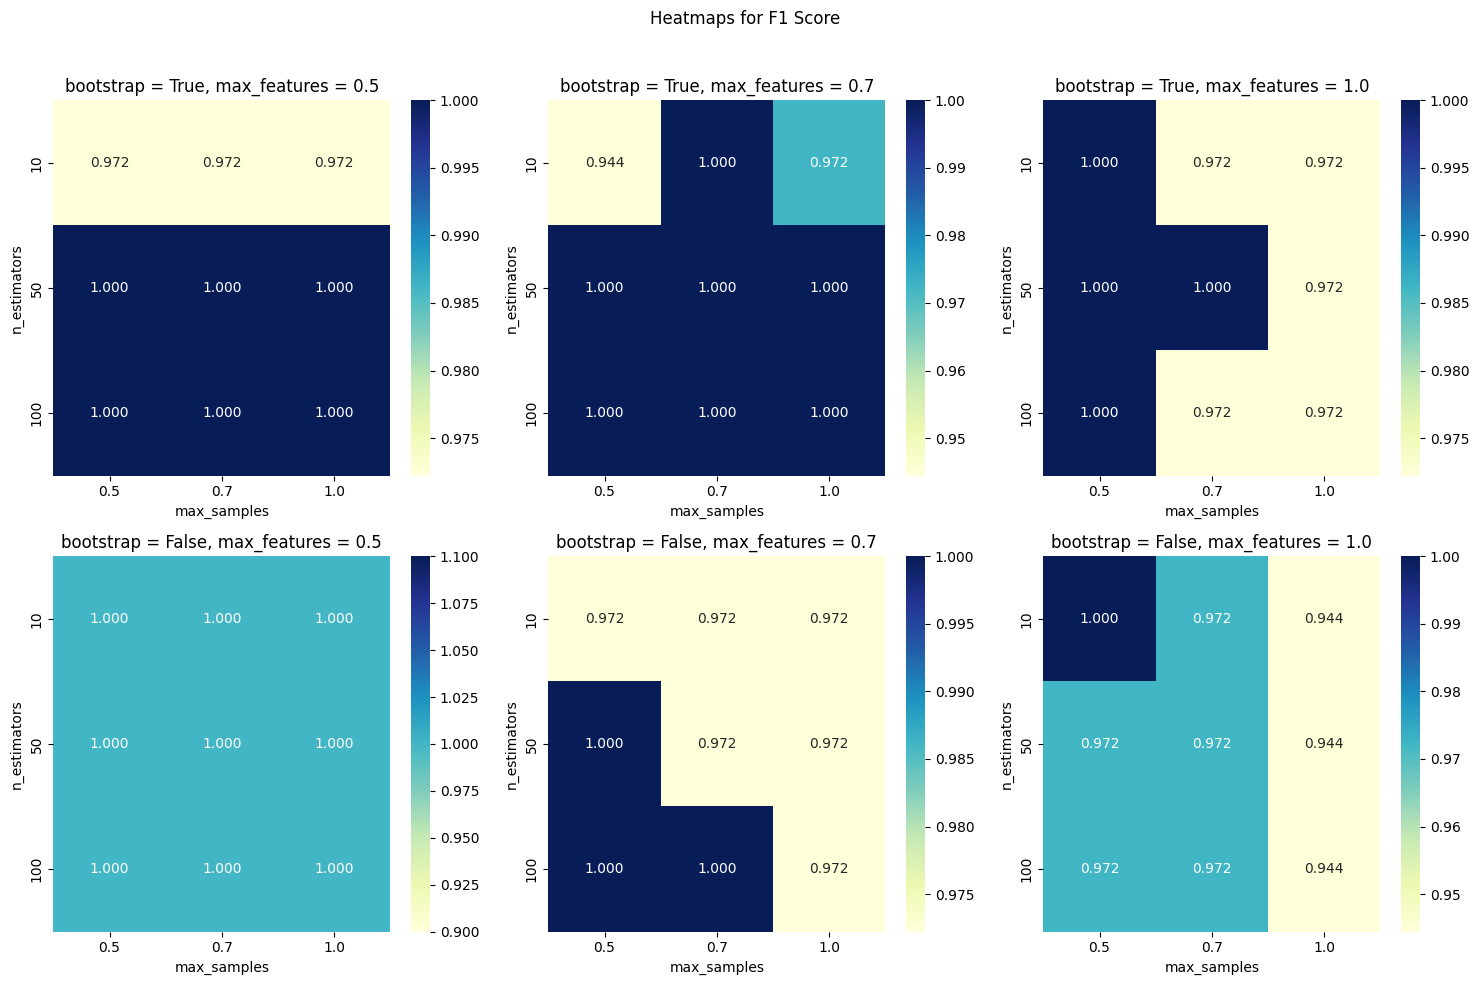

In [106]:
plot_heatmaps_bagg(results_bagg_wine)

### Glass

In [98]:
results_bagg_glass = analyze_bagging_parameters(
    X_train_glass,
    Y_train_glass,
    X_test_glass,
    Y_test_glass,
    n_estimators_range,
    max_samples_range,
    max_features_range,
    bootstrap_range,
)

display(results_bagg_glass.head())

,n_estimators,max_samples,max_features,bootstrap,accuracy,precision,recall,f1
0,10,0.5,0.5,True,0.720930,0.720930,0.720930,0.720930
1,10,0.5,0.5,False,0.744186,0.744186,0.744186,0.744186
2,10,0.5,0.7,True,0.790698,0.790698,0.790698,0.790698
3,10,0.5,0.7,False,0.767442,0.767442,0.767442,0.767442
4,10,0.5,1.0,True,0.790698,0.790698,0.790698,0.790698


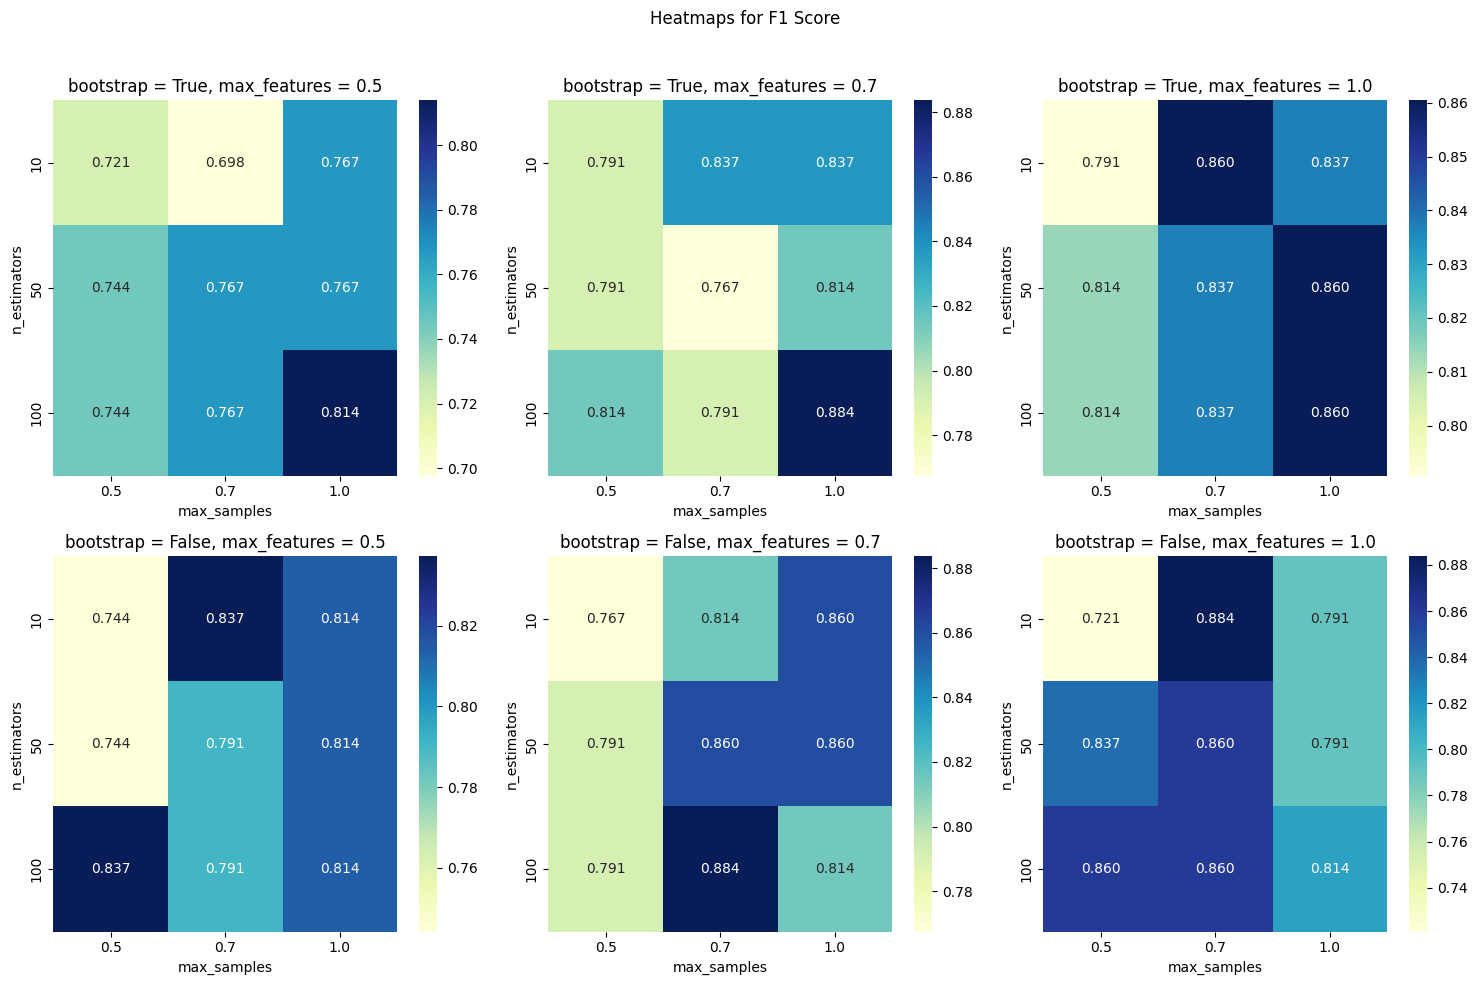

In [107]:
plot_heatmaps_bagg(results_bagg_glass)

### Seeds

In [100]:
results_bagg_seed = analyze_bagging_parameters(
    X_train_seed,
    Y_train_seed,
    X_test_seed,
    Y_test_seed,
    n_estimators_range,
    max_samples_range,
    max_features_range,
    bootstrap_range,
)

display(results_bagg_seed.head())
display(results_bagg_seed.tail())

,n_estimators,max_samples,max_features,bootstrap,accuracy,precision,recall,f1
0,10,0.5,0.5,True,0.809524,0.809524,0.809524,0.809524
1,10,0.5,0.5,False,0.833333,0.833333,0.833333,0.833333
2,10,0.5,0.7,True,0.809524,0.809524,0.809524,0.809524
3,10,0.5,0.7,False,0.833333,0.833333,0.833333,0.833333
4,10,0.5,1.0,True,0.833333,0.833333,0.833333,0.833333


,n_estimators,max_samples,max_features,bootstrap,accuracy,precision,recall,f1
49,100,1.0,0.5,False,0.928571,0.928571,0.928571,0.928571
50,100,1.0,0.7,True,0.880952,0.880952,0.880952,0.880952
51,100,1.0,0.7,False,0.880952,0.880952,0.880952,0.880952
52,100,1.0,1.0,True,0.928571,0.928571,0.928571,0.928571
53,100,1.0,1.0,False,0.857143,0.857143,0.857143,0.857143


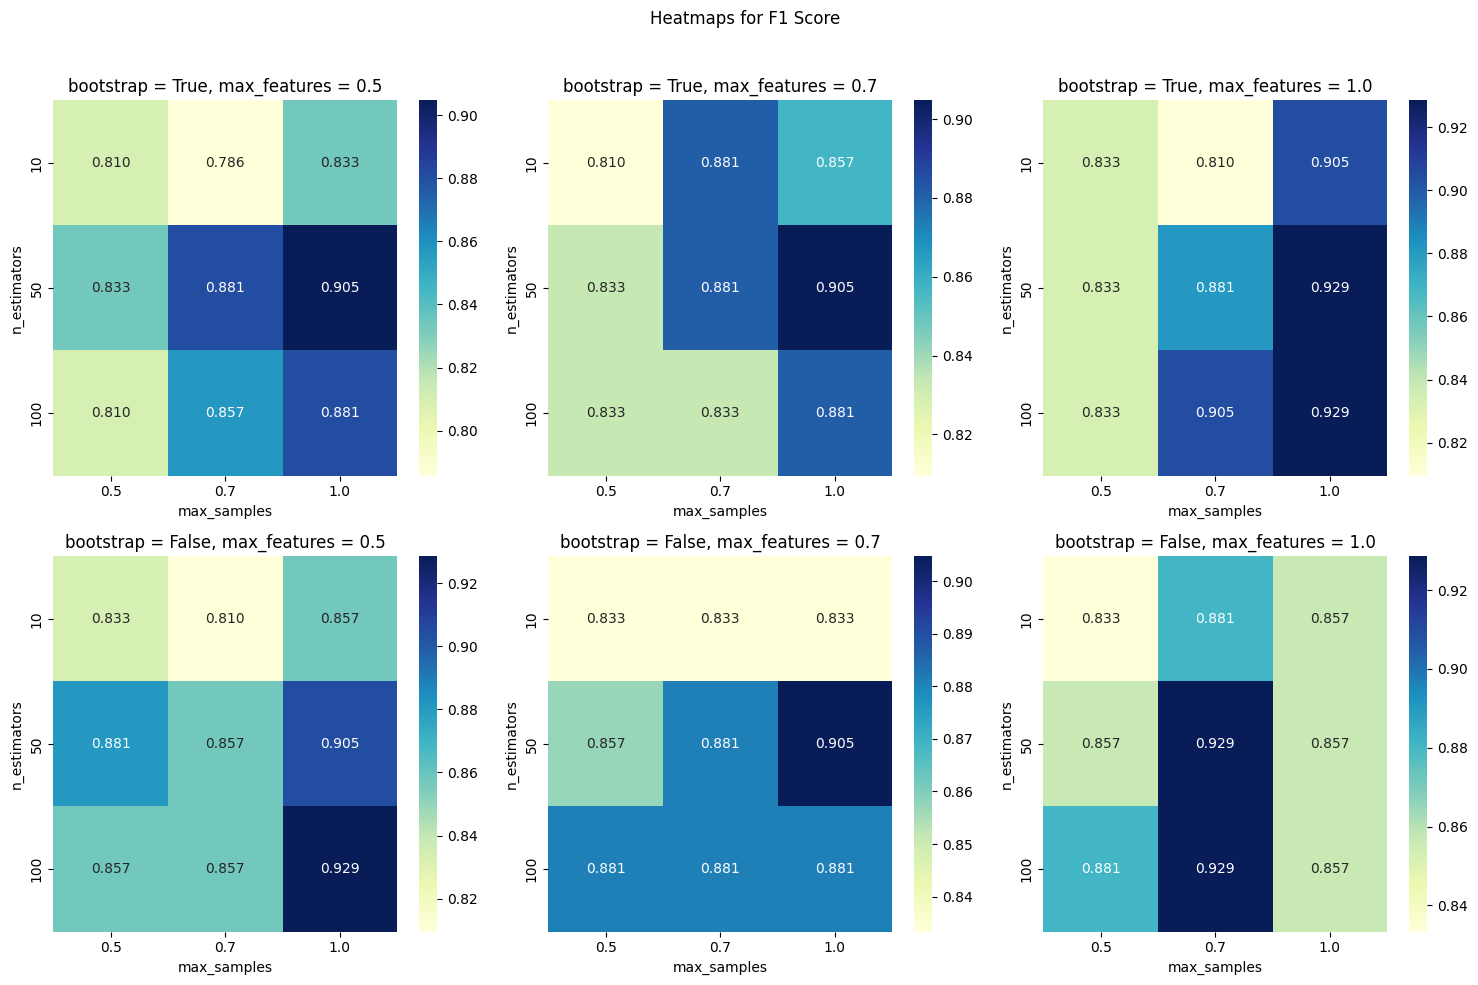

In [109]:
plot_heatmaps_bagg(results_bagg_seed)

## 3. Boosing tests

In [130]:
def analyze_adaboost_parameters(
    X_train, Y_train, X_test, Y_test, n_estimators_range, learning_rate_range
):
    results = []

    for n_estimators in n_estimators_range:
        for learning_rate in learning_rate_range:
            ada_classifier = AdaBoostClassifier(
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                random_state=42,
                algorithm="SAMME",
            )
            ada_classifier.fit(X_train, Y_train)
            predictions = ada_classifier.predict(X_test)
            accuracy = accuracy_score(Y_test, predictions)
            precision = precision_score(Y_test, predictions, average="micro")
            recall = recall_score(Y_test, predictions, average="micro")
            f1 = f1_score(Y_test, predictions, average="micro")
            results.append(
                (n_estimators, learning_rate, accuracy, precision, recall, f1)
            )

    results_df = pd.DataFrame(
        results,
        columns=[
            "n_estimators",
            "learning_rate",
            "accuracy",
            "precision",
            "recall",
            "f1",
        ],
    )

    return results_df


def plot_heatmaps_adaboost(results_df):
    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle("Heatmap for F1 Score")

    pivot_table = results_df.pivot_table(
        index="n_estimators", columns="learning_rate", values="f1", aggfunc="mean"
    )

    if pivot_table.empty:
        ax.text(
            0.5,
            0.5,
            "No data available",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )
    else:
        sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax)

    ax.set_title("F1 Score for Different n_estimators and learning_rate")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("n_estimators")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### Wine

In [116]:
n_estimators_range = [50, 100, 150, 200]
learning_rate_range = [0.0001, 0.1, 0.5, 1.0]

results_boost_wine = analyze_adaboost_parameters(
    X_train_wine,
    Y_train_wine,
    X_test_wine,
    Y_test_wine,
    n_estimators_range,
    learning_rate_range,
)

display(results_boost_wine.head())
display(results_boost_wine.tail())

,n_estimators,learning_rate,accuracy,precision,recall,f1
0,50,0.0001,0.666667,0.666667,0.666667,0.666667
1,50,0.1000,0.888889,0.888889,0.888889,0.888889
2,50,0.5000,0.916667,0.916667,0.916667,0.916667
3,50,1.0000,0.944444,0.944444,0.944444,0.944444
4,100,0.0001,0.666667,0.666667,0.666667,0.666667


,n_estimators,learning_rate,accuracy,precision,recall,f1
11,150,1.0000,0.944444,0.944444,0.944444,0.944444
12,200,0.0001,0.666667,0.666667,0.666667,0.666667
13,200,0.1000,0.916667,0.916667,0.916667,0.916667
14,200,0.5000,0.916667,0.916667,0.916667,0.916667
15,200,1.0000,0.944444,0.944444,0.944444,0.944444


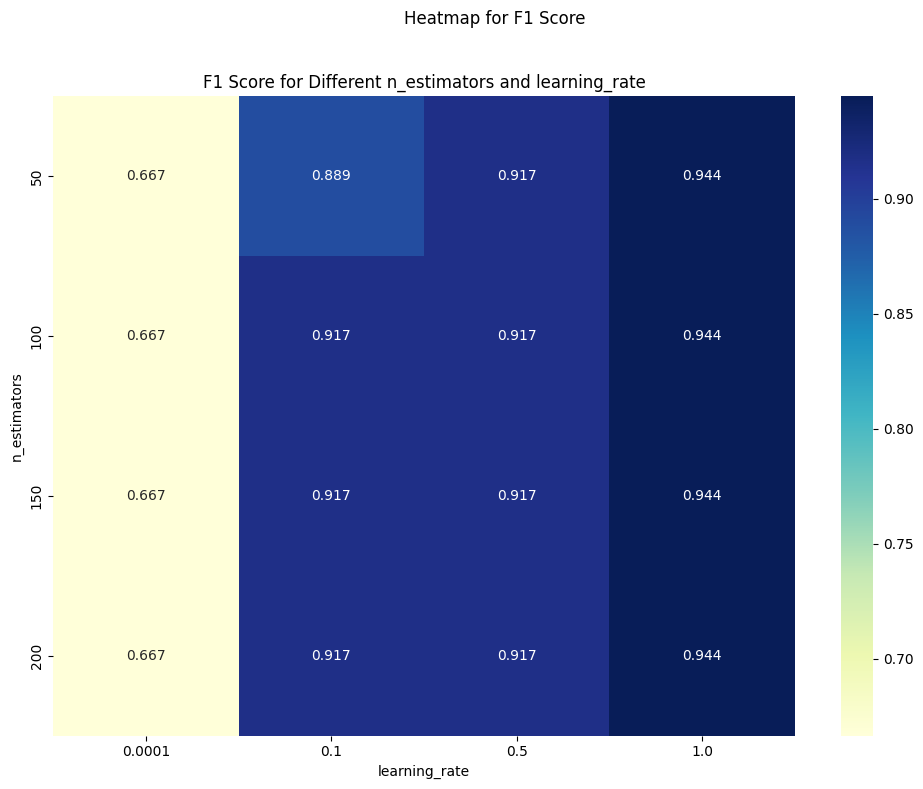

In [131]:
plot_heatmaps_adaboost(results_boost_wine)

### Glass

In [119]:
results_boost_glass = analyze_adaboost_parameters(
    X_train_glass,
    Y_train_glass,
    X_test_glass,
    Y_test_glass,
    n_estimators_range,
    learning_rate_range,
)

display(results_boost_glass.head())
display(results_boost_glass.tail())

,n_estimators,learning_rate,accuracy,precision,recall,f1
0,50,0.0001,0.511628,0.511628,0.511628,0.511628
1,50,0.1000,0.558140,0.558140,0.558140,0.558140
2,50,0.5000,0.511628,0.511628,0.511628,0.511628
3,50,1.0000,0.534884,0.534884,0.534884,0.534884
4,100,0.0001,0.511628,0.511628,0.511628,0.511628


,n_estimators,learning_rate,accuracy,precision,recall,f1
11,150,1.0000,0.697674,0.697674,0.697674,0.697674
12,200,0.0001,0.511628,0.511628,0.511628,0.511628
13,200,0.1000,0.604651,0.604651,0.604651,0.604651
14,200,0.5000,0.604651,0.604651,0.604651,0.604651
15,200,1.0000,0.674419,0.674419,0.674419,0.674419


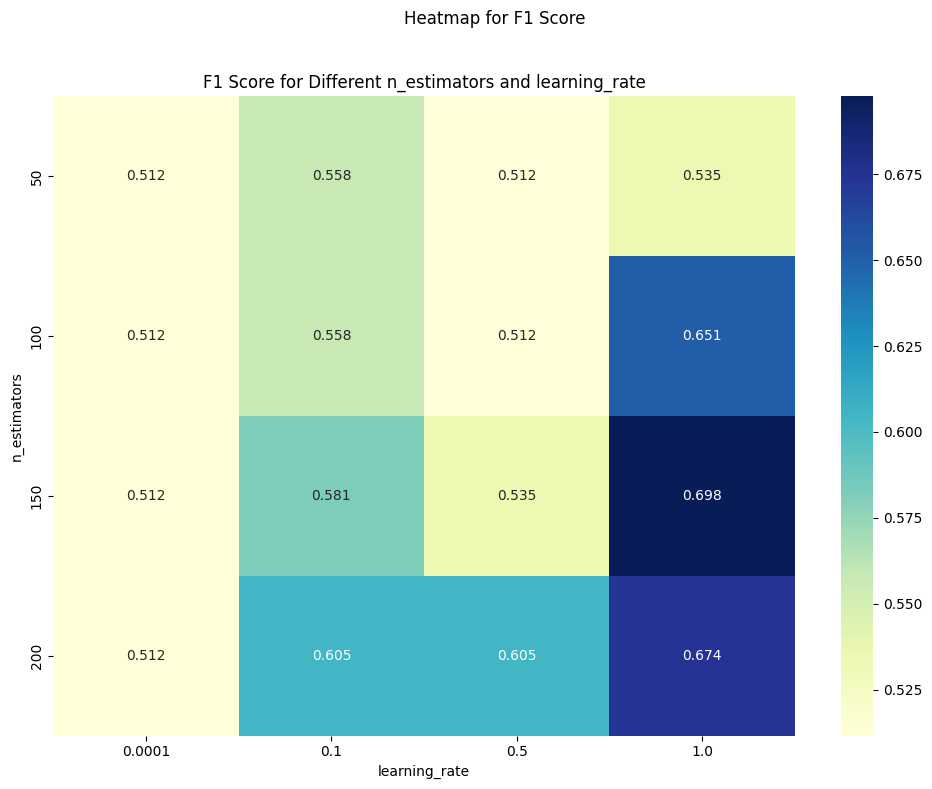

In [132]:
plot_heatmaps_adaboost(results_boost_glass)

### Seeds

In [120]:
results_boost_seed = analyze_adaboost_parameters(
    X_train_seed,
    Y_train_seed,
    X_test_seed,
    Y_test_seed,
    n_estimators_range,
    learning_rate_range,
)

display(results_boost_seed.head())
display(results_boost_seed.tail())

,n_estimators,learning_rate,accuracy,precision,recall,f1
0,50,0.0001,0.595238,0.595238,0.595238,0.595238
1,50,0.1000,0.809524,0.809524,0.809524,0.809524
2,50,0.5000,0.833333,0.833333,0.833333,0.833333
3,50,1.0000,0.833333,0.833333,0.833333,0.833333
4,100,0.0001,0.595238,0.595238,0.595238,0.595238


,n_estimators,learning_rate,accuracy,precision,recall,f1
11,150,1.0000,0.833333,0.833333,0.833333,0.833333
12,200,0.0001,0.595238,0.595238,0.595238,0.595238
13,200,0.1000,0.880952,0.880952,0.880952,0.880952
14,200,0.5000,0.833333,0.833333,0.833333,0.833333
15,200,1.0000,0.833333,0.833333,0.833333,0.833333


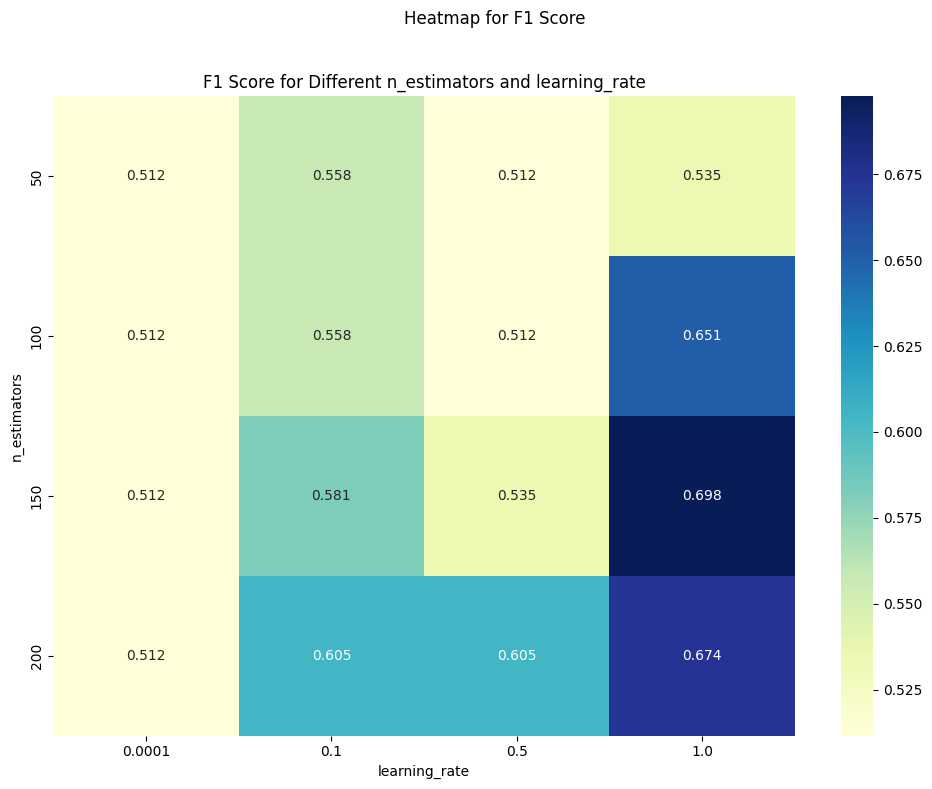

In [133]:
plot_heatmaps_adaboost(results_boost_glass)

## 4. Random Forest tests

In [122]:
def analyze_rf_parameters(
    X_train,
    Y_train,
    X_test,
    Y_test,
    n_estimators_range,
    max_depth_range,
    min_samples_split_range,
):
    results = []

    for n_estimators in n_estimators_range:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                rf_classifier = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    random_state=42,
                )
                rf_classifier.fit(X_train, Y_train)
                predictions = rf_classifier.predict(X_test)
                accuracy = accuracy_score(Y_test, predictions)
                precision = precision_score(Y_test, predictions, average="micro")
                recall = recall_score(Y_test, predictions, average="micro")
                f1 = f1_score(Y_test, predictions, average="micro")
                results.append(
                    (
                        n_estimators,
                        max_depth,
                        min_samples_split,
                        accuracy,
                        precision,
                        recall,
                        f1,
                    )
                )

    results_df = pd.DataFrame(
        results,
        columns=[
            "n_estimators",
            "max_depth",
            "min_samples_split",
            "accuracy",
            "precision",
            "recall",
            "f1",
        ],
    )
    results_df = results_df.fillna("None")

    return results_df


# Function to plot heatmaps for each metric
def plot_heatmaps(results_df):
    metrics = ["accuracy", "precision", "recall", "f1"]
    metrics = ["f1"]
    unique_max_depths = results_df["max_depth"].unique()

    for metric in metrics:
        fig, axs = plt.subplots(
            len(unique_max_depths), 1, figsize=(12, len(unique_max_depths) * 5)
        )
        fig.suptitle(f"Heatmaps for {metric.capitalize()}")

        if len(unique_max_depths) == 1:
            axs = [axs]  # Ensure axs is iterable

        for i, max_depth in enumerate(unique_max_depths):
            ax = axs[i]
            subset = results_df[results_df["max_depth"] == max_depth]
            pivot_table = subset.pivot_table(
                index="n_estimators", columns="min_samples_split", values=metric
            )

            if pivot_table.empty:
                ax.text(
                    0.5,
                    0.5,
                    "No data available",
                    horizontalalignment="center",
                    verticalalignment="center",
                    transform=ax.transAxes,
                )
            else:
                sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu", ax=ax)

            ax.set_title(f"max_depth = {max_depth}")
            ax.set_xlabel("min_samples_split")
            ax.set_ylabel("n_estimators")

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

### Wine

In [124]:
n_estimators_range = range(1, 30, 5)
max_depth_range = [None, 1, 10, 20]
min_samples_split_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

results_rf_wine = analyze_rf_parameters(
    X_train_wine,
    Y_train_wine,
    X_test_wine,
    Y_test_wine,
    n_estimators_range,
    max_depth_range,
    min_samples_split_range,
)

display(results_rf_wine.tail())
display(results_rf_wine.head())

,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
211,26,20.0,6,0.972222,0.972222,0.972222,0.972222
212,26,20.0,7,1.000000,1.000000,1.000000,1.000000
213,26,20.0,8,1.000000,1.000000,1.000000,1.000000
214,26,20.0,9,0.972222,0.972222,0.972222,0.972222
215,26,20.0,10,0.972222,0.972222,0.972222,0.972222


,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
0,1,None,2,0.833333,0.833333,0.833333,0.833333
1,1,None,3,0.833333,0.833333,0.833333,0.833333
2,1,None,4,0.916667,0.916667,0.916667,0.916667
3,1,None,5,0.916667,0.916667,0.916667,0.916667
4,1,None,6,0.916667,0.916667,0.916667,0.916667


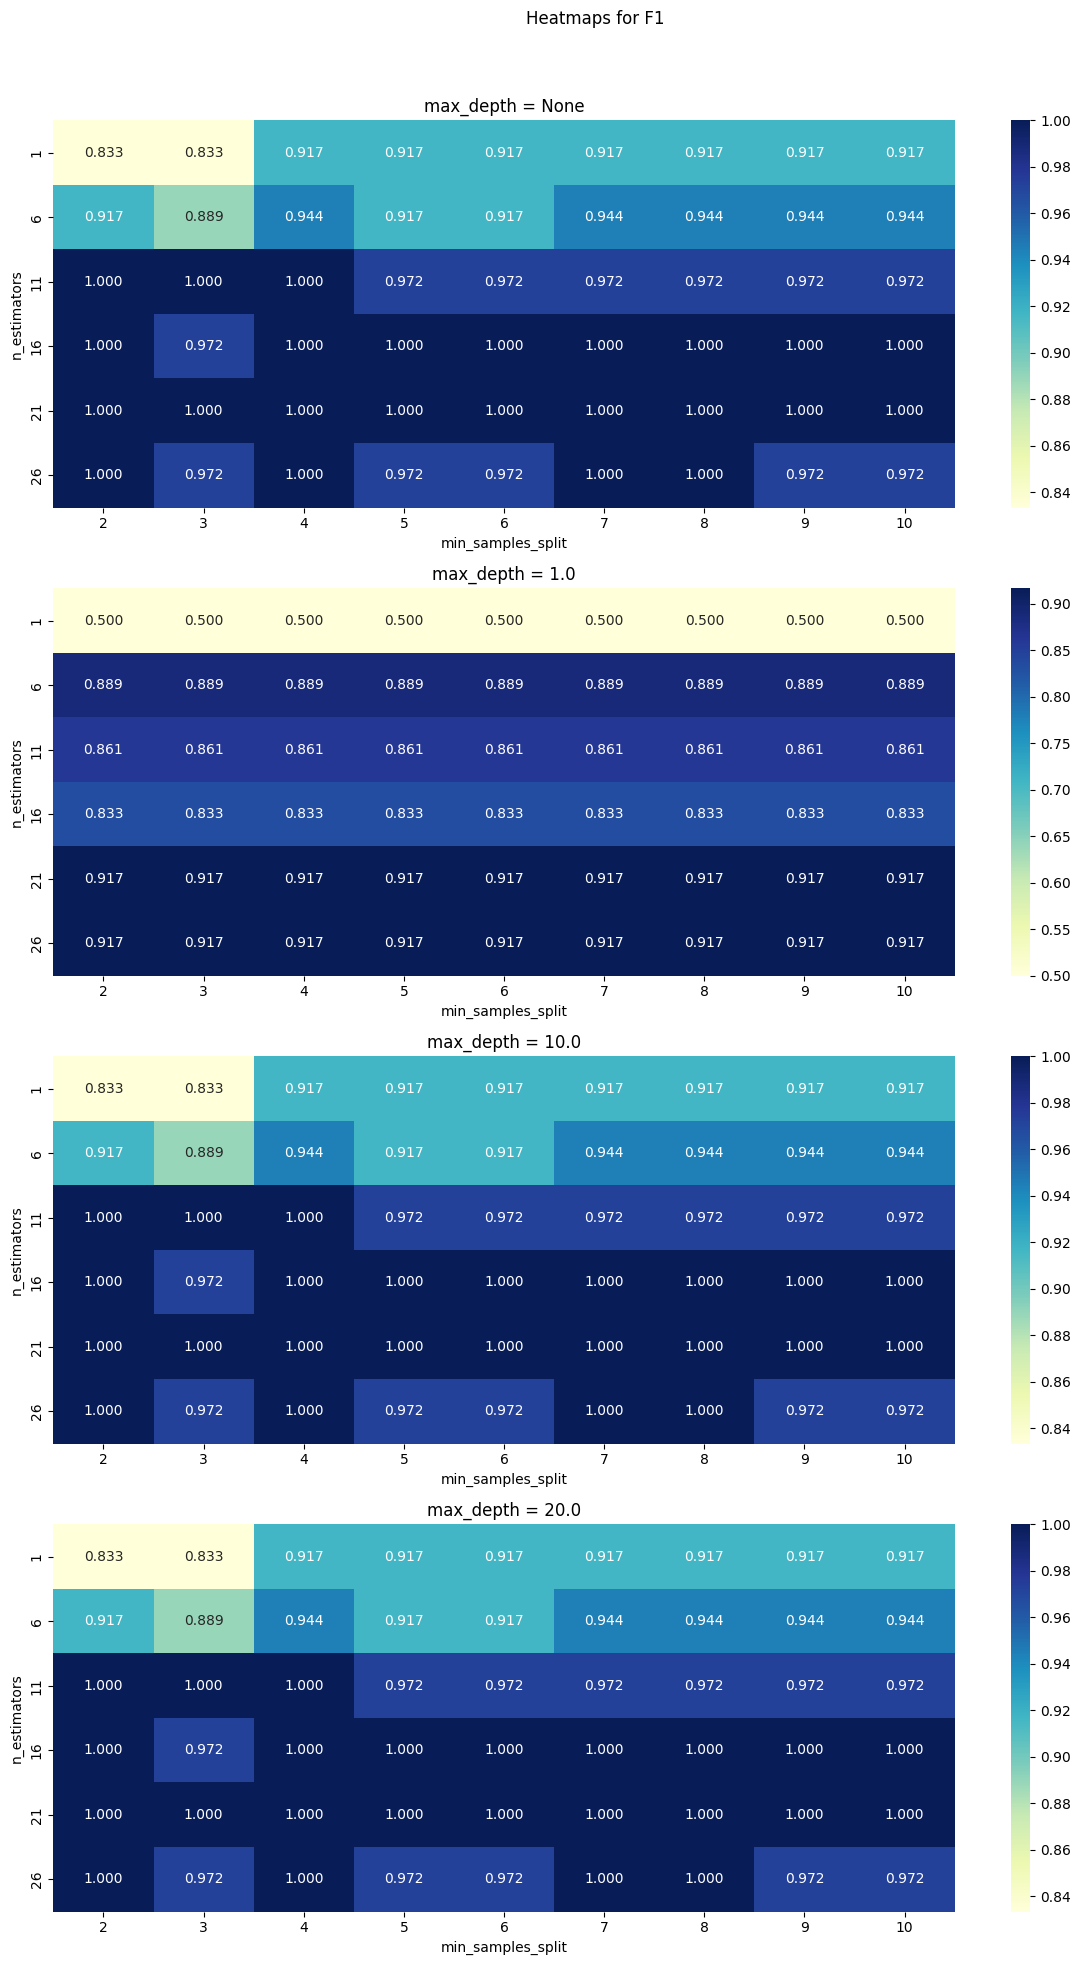

In [125]:
plot_heatmaps(results_rf_wine)

### Glass

In [126]:
results_rf_glass = analyze_rf_parameters(
    X_train_glass,
    Y_train_glass,
    X_test_glass,
    Y_test_glass,
    n_estimators_range,
    max_depth_range,
    min_samples_split_range,
)


display(results_rf_glass.tail())
display(results_rf_glass.head())

,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
211,26,20.0,6,0.790698,0.790698,0.790698,0.790698
212,26,20.0,7,0.837209,0.837209,0.837209,0.837209
213,26,20.0,8,0.790698,0.790698,0.790698,0.790698
214,26,20.0,9,0.813953,0.813953,0.813953,0.813953
215,26,20.0,10,0.790698,0.790698,0.790698,0.790698


,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
0,1,None,2,0.697674,0.697674,0.697674,0.697674
1,1,None,3,0.720930,0.720930,0.720930,0.720930
2,1,None,4,0.767442,0.767442,0.767442,0.767442
3,1,None,5,0.837209,0.837209,0.837209,0.837209
4,1,None,6,0.674419,0.674419,0.674419,0.674419


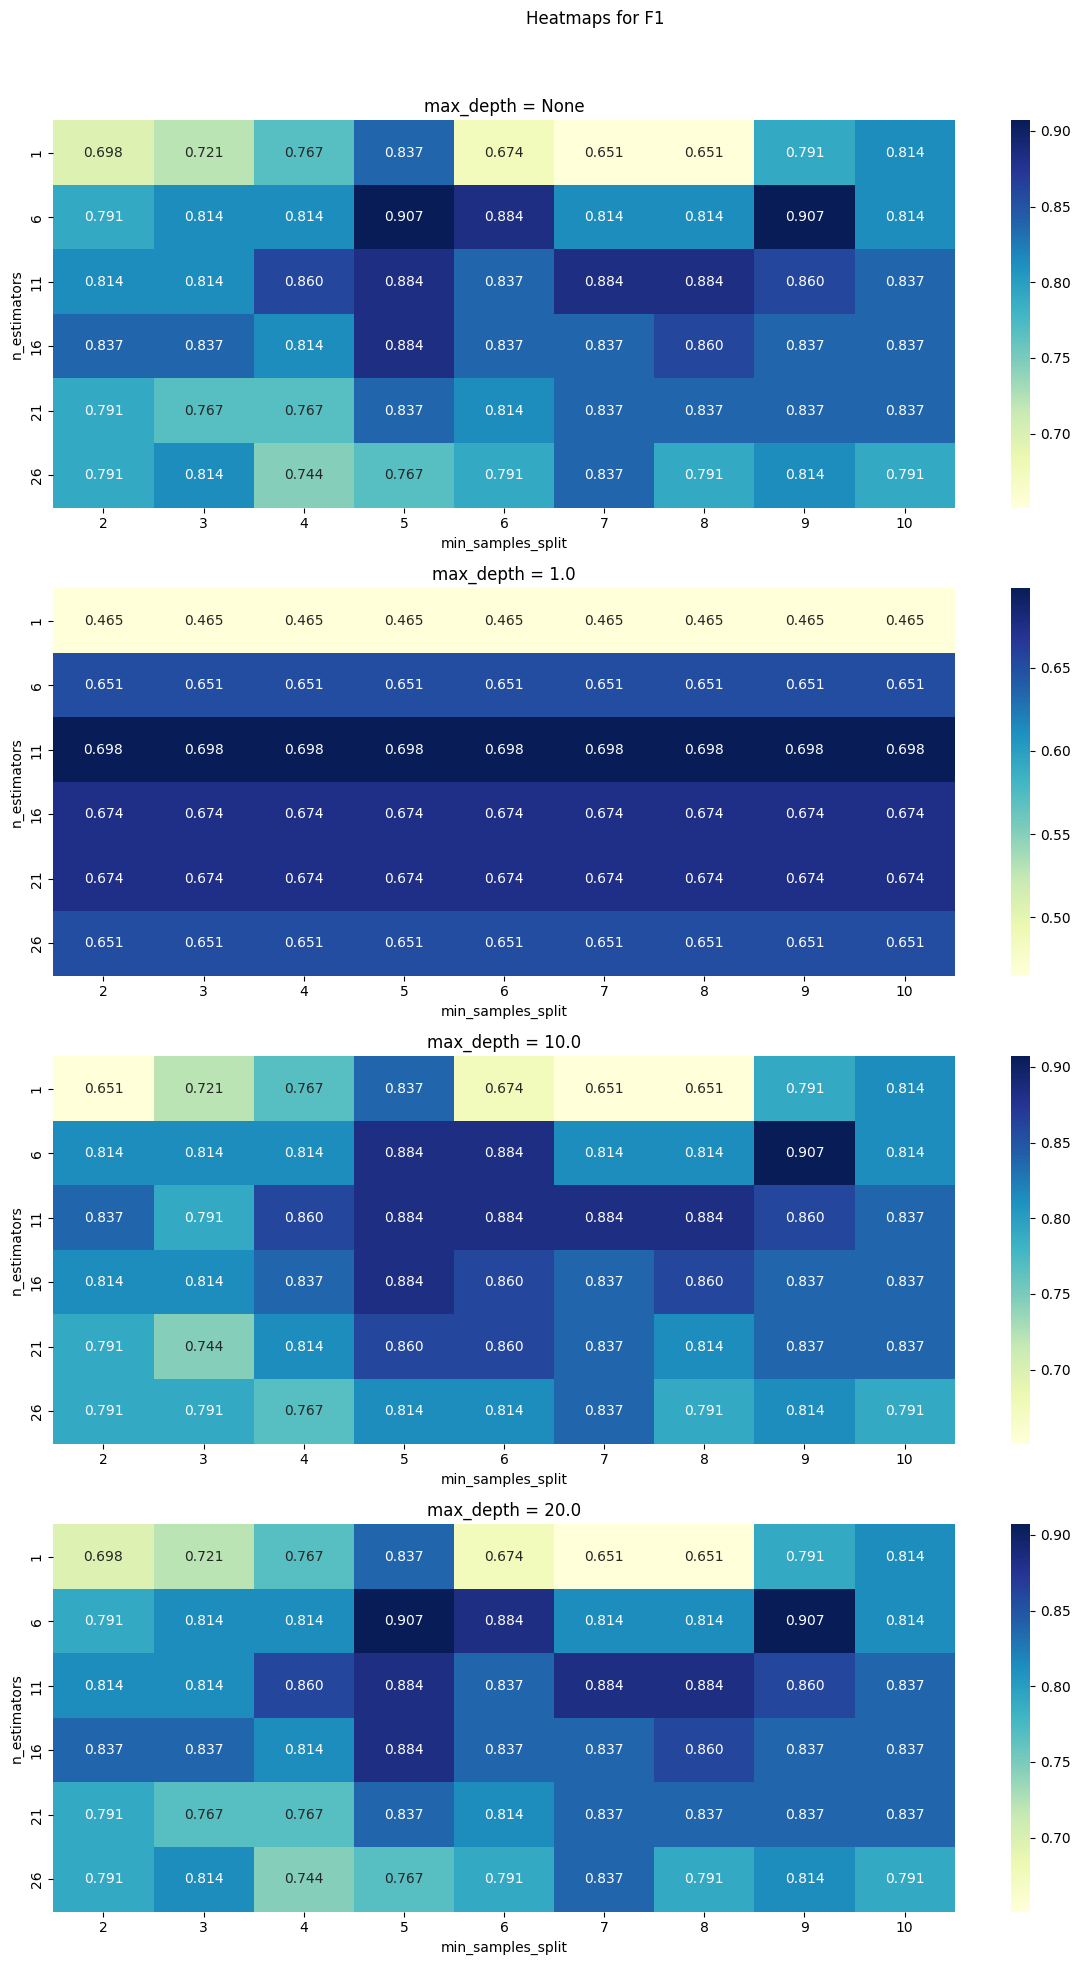

In [127]:
plot_heatmaps(results_rf_glass)

### Seeds

In [128]:
results_rf_seed = analyze_rf_parameters(
    X_train_seed,
    Y_train_seed,
    X_test_seed,
    Y_test_seed,
    n_estimators_range,
    max_depth_range,
    min_samples_split_range,
)

display(results_rf_seed.tail())
display(results_rf_seed.head())

,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
211,26,20.0,6,0.833333,0.833333,0.833333,0.833333
212,26,20.0,7,0.833333,0.833333,0.833333,0.833333
213,26,20.0,8,0.880952,0.880952,0.880952,0.880952
214,26,20.0,9,0.880952,0.880952,0.880952,0.880952
215,26,20.0,10,0.857143,0.857143,0.857143,0.857143


,n_estimators,max_depth,min_samples_split,accuracy,precision,recall,f1
0,1,None,2,0.952381,0.952381,0.952381,0.952381
1,1,None,3,0.952381,0.952381,0.952381,0.952381
2,1,None,4,0.833333,0.833333,0.833333,0.833333
3,1,None,5,0.857143,0.857143,0.857143,0.857143
4,1,None,6,0.833333,0.833333,0.833333,0.833333


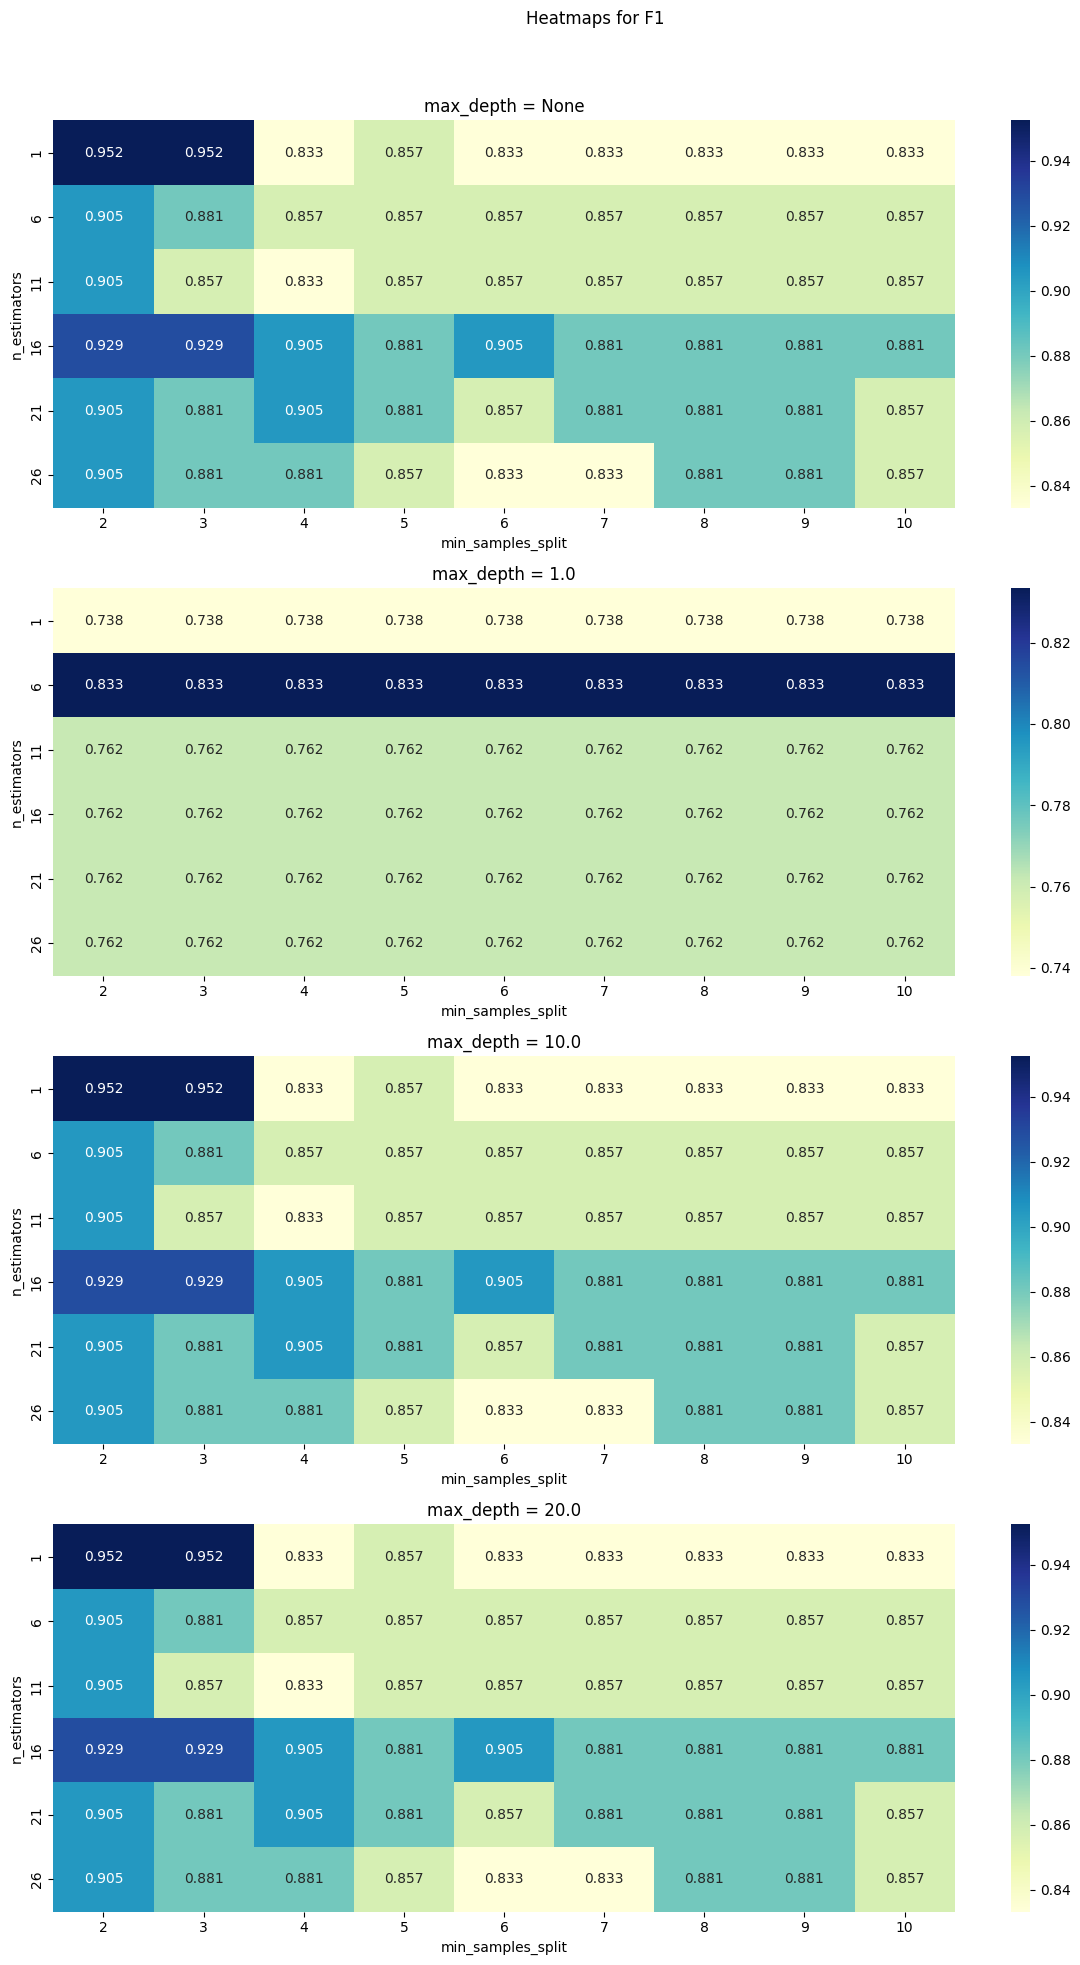

In [129]:
plot_heatmaps(results_rf_seed)

## 5. czy walidacja krzyżowa jest potrzebna?

## 6. Zestawienie wyników działania 3 zbadanych algorytmów

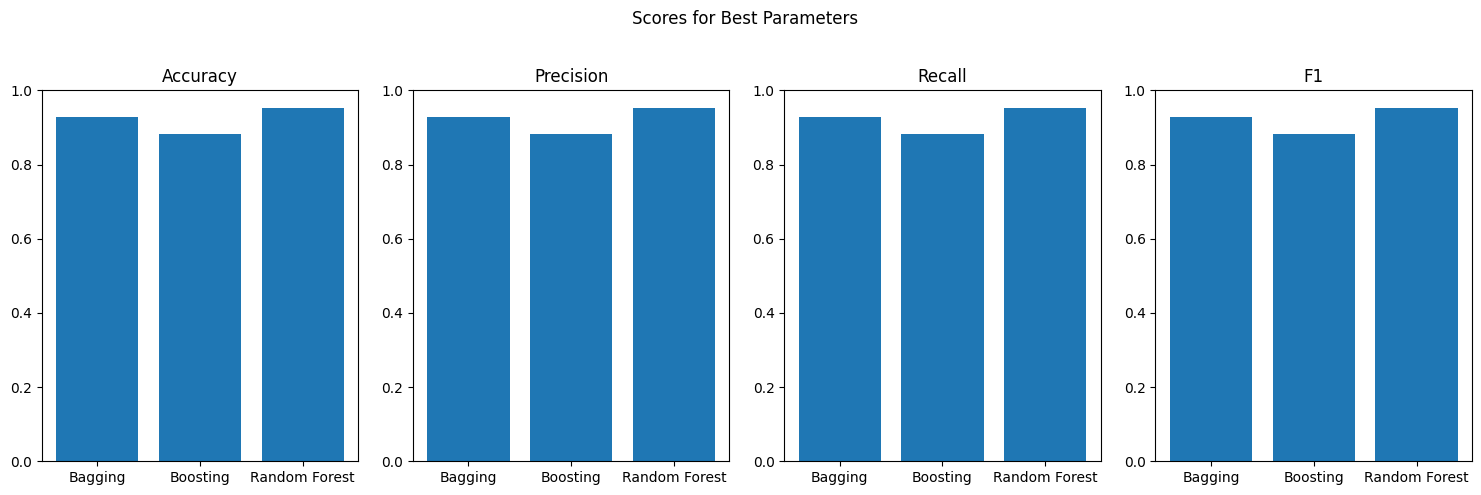

In [136]:
# get best parameters for each method for dataset seeds


def get_best_parameters(results_df):
    best_params = results_df.loc[results_df["f1"].idxmax()]
    return best_params


def plot_best_parameters(best_params_bagg, best_params_boost, best_params_rf):
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle("Scores for Best Parameters")

    metrics = ["accuracy", "precision", "recall", "f1"]
    for i, metric in enumerate(metrics):
        ax[i].bar(
            ["Bagging", "Boosting", "Random Forest"],
            [
                best_params_bagg[metric],
                best_params_boost[metric],
                best_params_rf[metric],
            ],
        )
        ax[i].set_title(f"{metric.capitalize()}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


best_params_bagg_seed = get_best_parameters(results_bagg_seed)
best_params_boost_seed = get_best_parameters(results_boost_seed)
best_params_rf_seed = get_best_parameters(results_rf_seed)

plot_best_parameters(best_params_bagg_seed, best_params_boost_seed, best_params_rf_seed)

## 7. Porównanie wyników z klasyfikatorami bazowymi